## Load dataset as DataFrame

In [882]:
# libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

In [883]:
ds = datasets.load_breast_cancer(as_frame=True)
print(ds.data[:5])
print(ds.feature_names)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [884]:
list(ds.target_names)

[np.str_('malignant'), np.str_('benign')]

In [885]:
# samples 10, 50, and 85, and want to know their class name
ds.target[[10, 50, 85]]

10    0
50    1
85    0
Name: target, dtype: int64

In [886]:
# Create DataFrame
# df = pd.DataFrame(ds.data, columns=ds.feature_names)
# df["label"] = ds.target
print(ds.data.shape)
print(ds.target.shape)



(569, 30)
(569,)


## Split train and test dataset

In [887]:
X = ds.data
y = ds.target
# X[:3]
# y[:3]

In [888]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                    random_state=123, 
                                                    stratify=y)

## Implement Algorithm

In [889]:
from scipy.stats import norm
import numpy as np

In [890]:
X_malignant = X_train[y_train == 0]
X_benign = X_train[y_train == 1]

In [891]:
mu_0, sigma_0 = X_malignant.mean(axis=0), X_malignant.std(axis=0)
mu_1, sigma_1 = X_benign.mean(axis=0), X_benign.std(axis=0)

In [892]:
np.shape(mu_0)
mu_0_radius = mu_0[:1]
sigma_0_radius = sigma_0[:1]
mu_1_radius = mu_1[:1]
sigma_1_radius = sigma_1[:1]


In [893]:
def predict_label(x_i, mu_0, sigma_0, mu_1, sigma_1):
    p_0 = norm.pdf(x_i, loc=mu_0, scale=sigma_0)
    p_1 = norm.pdf(x_i, loc=mu_1, scale=sigma_1)
    predicted_label = np.where(p_1 > p_0, 1, 0)
    return predicted_label

In [894]:
# X_train[:, :1]
# np.shape(X_train)
X_malignant.iloc[:, :1]

,mean radius
99,14.42
263,15.61
389,19.55
197,18.08
535,20.55
...,...
282,19.40
138,14.95
328,16.27
11,15.78


In [895]:
predict_labels = predict_label(X_train.iloc[:, :1], mu_0_radius, sigma_0_radius, mu_1_radius, sigma_1_radius)
np.shape(predict_labels)
type(predict_labels)
predict_labels = np.array(predict_labels)

## Compute the emperical risk: 

In [896]:

y_train = pd.DataFrame(y_train)
np.shape(y_train)
type(y_train)

pandas.core.frame.DataFrame

In [897]:
error_ERM = np.where(y_train != predict_labels, 1, 0)
risk_ERM = np.mean(error_ERM)
print("ERM Risk:", risk_ERM)

ERM Risk: 0.12747252747252746


In [898]:
accuracy_ERM = np.sum(error_ERM==0)/len(y_train)
print(f"(ERM) training accuracy: {accuracy_ERM*100:.2f}%")

(ERM) training accuracy: 87.25%


## Multiple variabels

# ERM

In [899]:
type(X_train)

pandas.core.frame.DataFrame

In [900]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [901]:
# center data
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
y_train = y_train - y_train.mean(axis=0)

In [902]:
beta = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
len(beta)
beta


array([[ 1.30392682],
       [ 0.00238552],
       [-1.00032278],
       [-0.27262384],
       [ 0.00797966],
       [ 0.2111889 ],
       [-0.16711427],
       [ 0.01533939],
       [-0.02715087],
       [ 0.00222175],
       [-0.23941941],
       [ 0.0092725 ],
       [ 0.14629682],
       [ 0.07592272],
       [-0.03475036],
       [ 0.04151241],
       [ 0.13493048],
       [-0.10122434],
       [-0.02962354],
       [ 0.02858141],
       [-0.95872374],
       [-0.06422731],
       [ 0.02253167],
       [ 0.6496507 ],
       [-0.0098561 ],
       [ 0.01235054],
       [-0.08377134],
       [-0.03686931],
       [-0.01354289],
       [-0.10362014]])

In [903]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(beta))

(455, 30)
(455, 1)
(30, 1)


In [904]:
y_train - np.dot(X_train, beta)

array([[ 1.34357379e-01],
       [-1.36691234e-01],
       [-4.91103321e-01],
       [-6.24893649e-01],
       [ 1.28072510e-01],
       [ 4.39968943e-02],
       [-3.16947030e-02],
       [ 3.99822474e-01],
       [-1.97545443e-02],
       [ 1.15632939e-01],
       [-3.28872266e-02],
       [-6.56297130e-01],
       [ 3.36459562e-01],
       [-4.74403457e-02],
       [ 7.00231845e-02],
       [-1.07722027e-01],
       [ 4.08636435e-01],
       [-5.52987339e-01],
       [ 1.71431334e-01],
       [ 7.07933521e-02],
       [-1.52817758e-01],
       [ 1.30253267e-01],
       [ 3.01687647e-01],
       [-4.28401483e-01],
       [ 2.31779984e-01],
       [ 8.69435154e-02],
       [-7.19624132e-02],
       [-7.78958963e-02],
       [-1.26923276e-01],
       [ 2.33818622e-01],
       [ 9.42942340e-02],
       [-6.08175469e-01],
       [ 5.32946102e-02],
       [-7.37753577e-04],
       [ 1.71338888e-01],
       [ 2.24020606e-01],
       [ 4.58811314e-02],
       [ 9.43206308e-02],
       [ 7.2

In [905]:
loss_OLS = (y_train - np.dot(X_train, beta))**2
empirical_risk_ols = loss_OLS.mean(axis=0)
# print(empirical_risk)
print((np.sum(loss_OLS)))
print(np.linalg.norm(y_train - np.dot(X_train, beta)))

23.601098632705963
4.858096194262312


In [906]:
y_train_OLS_labels = np.where(np.dot(X_train, beta) >= 0, 1, 0)
error_OLS = np.where(y_train_OLS_labels != predict_labels, 1, 0)
accuracy_OLS = np.sum(error_OLS==0)/len(y_train_OLS_labels)
print(f"(OLS) training accuracy: {accuracy_OLS*100:.2f}%")

(OLS) training accuracy: 87.47%


Limination of this **Linear class**: linear function's output does not gurantee to be in {0, 1}, but this is a classification promble which can make the classification task hare to accomplish. 

# Gradient Descent

In [907]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                    random_state=123, 
                                                    stratify=y)

In [908]:
X_train = X_train.to_numpy()
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
y_train = y_train.to_numpy().reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_train

array([[ 1.        , -0.90291183, -0.1682904 , ..., -0.54704001,
        -1.03585051, -0.38904053],
       [ 1.        , -1.80564149,  1.17488232, ..., -1.74930814,
        -0.04063757, -0.76631932],
       [ 1.        ,  0.08498099,  0.09808671, ...,  0.63632596,
        -0.28623044,  0.49345431],
       ...,
       [ 1.        ,  0.11904626,  1.85211227, ...,  0.86040789,
         2.1215428 ,  2.70214128],
       [ 1.        , -0.46857964, -0.45724184, ..., -0.14414986,
         0.22261231, -0.42769391],
       [ 1.        , -0.80071602, -0.25858773, ...,  0.10737067,
         0.66082704,  2.46259919]], shape=(455, 31))

In [909]:
beta = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
len(beta)
beta

array([[ 0.62637363],
       [ 1.30392682],
       [ 0.00238552],
       [-1.00032278],
       [-0.27262384],
       [ 0.00797966],
       [ 0.2111889 ],
       [-0.16711427],
       [ 0.01533939],
       [-0.02715087],
       [ 0.00222175],
       [-0.23941941],
       [ 0.0092725 ],
       [ 0.14629682],
       [ 0.07592272],
       [-0.03475036],
       [ 0.04151241],
       [ 0.13493048],
       [-0.10122434],
       [-0.02962354],
       [ 0.02858141],
       [-0.95872374],
       [-0.06422731],
       [ 0.02253167],
       [ 0.6496507 ],
       [-0.0098561 ],
       [ 0.01235054],
       [-0.08377134],
       [-0.03686931],
       [-0.01354289],
       [-0.10362014]])

In [910]:
loss = (y_train - np.dot(X_train, beta))**2
empirical_risk = loss.mean(axis=0)
# print(empirical_risk)
print((np.sum(loss)))
print(np.linalg.norm(y_train - np.dot(X_train, beta)))

23.601098632705963
4.858096194262313


In [911]:
X_train
# y_train.shape

array([[ 1.        , -0.90291183, -0.1682904 , ..., -0.54704001,
        -1.03585051, -0.38904053],
       [ 1.        , -1.80564149,  1.17488232, ..., -1.74930814,
        -0.04063757, -0.76631932],
       [ 1.        ,  0.08498099,  0.09808671, ...,  0.63632596,
        -0.28623044,  0.49345431],
       ...,
       [ 1.        ,  0.11904626,  1.85211227, ...,  0.86040789,
         2.1215428 ,  2.70214128],
       [ 1.        , -0.46857964, -0.45724184, ..., -0.14414986,
         0.22261231, -0.42769391],
       [ 1.        , -0.80071602, -0.25858773, ...,  0.10737067,
         0.66082704,  2.46259919]], shape=(455, 31))

In [912]:
Q = X_train.T@X_train
Q.shape
# X_train.shape

(31, 31)

In [913]:
P = 2*X_train.T@y_train
P

array([[ 570.        ],
       [-321.49717449],
       [-165.92401576],
       [-326.89635623],
       [-312.21339517],
       [-158.99963404],
       [-255.04554276],
       [-302.27489216],
       [-341.27151396],
       [-157.10187235],
       [  13.45007528],
       [-249.81772241],
       [  15.55682852],
       [-241.25106212],
       [-235.84519884],
       [  37.78424096],
       [-112.50427568],
       [ -94.44708137],
       [-171.30584474],
       [   6.39204465],
       [ -16.44881782],
       [-341.03285679],
       [-186.08596097],
       [-343.3422921 ],
       [-321.19344886],
       [-185.04148502],
       [-250.79037146],
       [-283.53182445],
       [-345.03818155],
       [-186.22102773],
       [-133.84006334]])

In [914]:
w_0 = np.zeros((X_train.shape[1], 1))
w_0.shape

(31, 1)

In [915]:
def gradientDescent(num_epoch = 100, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train):
    Q = 2*X.T@X
    P = 2*X.T@Y
    w_0 = np.zeros((X_train.shape[1], 1))
    w = w_0

    gradient_list = np.zeros((num_epoch, 1))
    loss_list = np.zeros((num_epoch, 1))

    for i in range(num_epoch):
        gradient = Q@w - P
        grad_norm = np.linalg.norm(gradient)
        gradient_list[i] = grad_norm

        w = w - learning_rate * gradient
        
        loss_list[i] = np.linalg.norm(Y - X@w)
        
        # print(f"epoch {i}: \n", w)
        # print("epoch: ", i)
        if grad_norm <= epsilon or grad_norm == 0:
            print("Converged at epoch: ", i)
            gradient_list = gradient_list[:i+1]
            break
    
    return w, gradient_list, loss_list

In [916]:
np.linalg.norm(y_train-X_train@beta)

np.float64(4.858096194262313)

[[ 0.62637363]
 [-0.08252825]
 [ 0.00133796]
 [-0.06980878]
 [ 0.07644951]
 [ 0.01983058]
 [ 0.12979209]
 [-0.12674465]
 [-0.04135976]
 [-0.01435638]
 [ 0.03119726]
 [-0.27180591]
 [ 0.01499285]
 [ 0.05381658]
 [ 0.17114356]
 [-0.02938648]
 [ 0.04988997]
 [ 0.11543823]
 [-0.06307149]
 [-0.02264914]
 [ 0.0140178 ]
 [-0.19311273]
 [-0.06856614]
 [-0.05493461]
 [ 0.15327892]
 [-0.02747944]
 [ 0.03721731]
 [-0.09856741]
 [-0.0566131 ]
 [-0.03112684]
 [-0.11250774]]


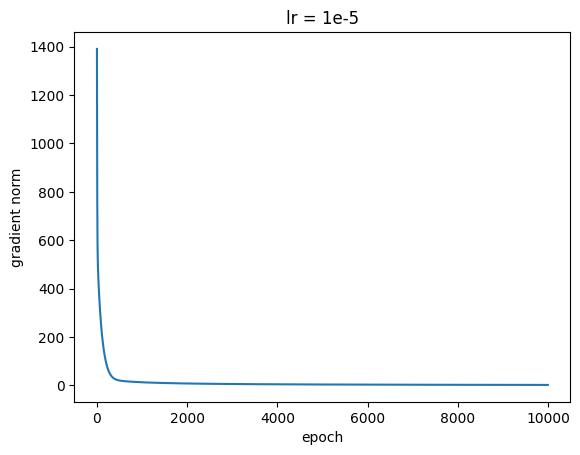

gradient: 
 [[1390.48372068]
 [1255.59709756]
 [1139.27341541]
 ...
 [   1.7695681 ]
 [   1.76937876]
 [   1.76918945]]


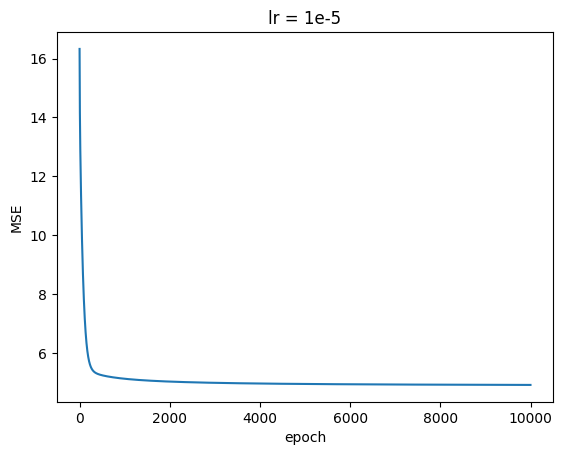

loss: 
 [[16.32829498]
 [15.86150632]
 [15.46563145]
 ...
 [ 4.91444784]
 [ 4.91444466]
 [ 4.91444147]]


In [917]:
import matplotlib.pyplot as plt

w, gradient_list, loss = gradientDescent(num_epoch = 10000, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train)

print(w)

plt.plot(gradient_list)
plt.xlabel("epoch")
plt.ylabel("gradient norm")
plt.title("lr = 1e-5")
plt.show()
print("gradient: \n", gradient_list)

plt.plot(loss)
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("lr = 1e-5")
plt.show()
print("loss: \n", loss)

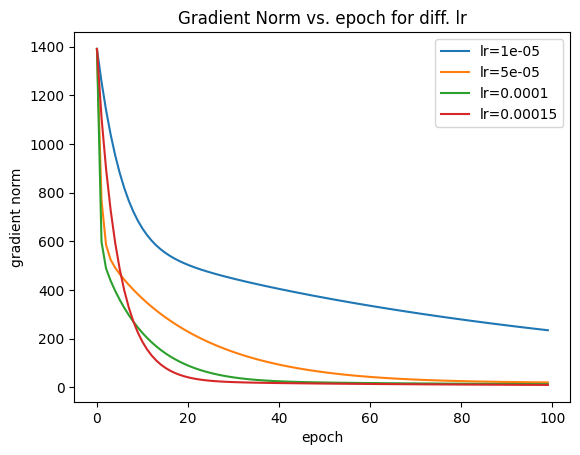

In [918]:
num_epoch = 100
lr_list = [1e-5, 5e-5, 1e-4, 1.5e-4]
grad_list = np.zeros((num_epoch, len(lr_list))) # (100, 5)
loss_list = np.zeros((num_epoch, len(lr_list)))

for i in range(len(lr_list)):
    w, gradient_list, loss = gradientDescent(num_epoch = 100, learning_rate = lr_list[i], epsilon = 1e-5, X = X_train, Y = y_train)
    grad_list[:, i] = gradient_list.reshape(-1)
    loss_list[:, i] = loss.reshape(-1)

for i, lr in enumerate(lr_list):
    plt.plot(grad_list[:, i], label = f"lr={lr}")
plt.xlabel("epoch"),
plt.ylabel("gradient norm")
plt.title("Gradient Norm vs. epoch for diff. lr")
plt.legend()

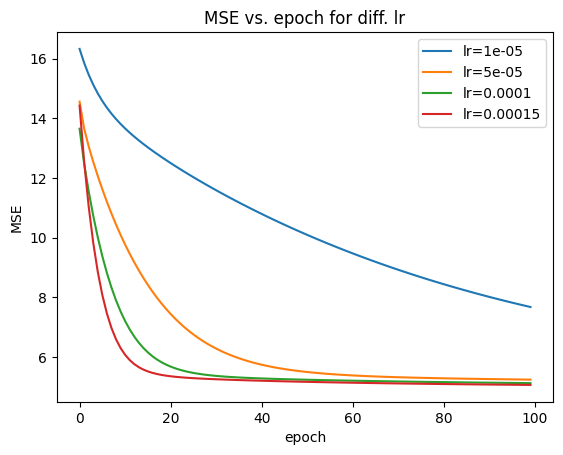

In [920]:
num_epoch = 100
lr_list = [1e-5, 5e-5, 1e-4, 1.5e-4]
grad_list = np.zeros((num_epoch, len(lr_list))) # (100, 5)
loss_list = np.zeros((num_epoch, len(lr_list)))

for i in range(len(lr_list)):
    w, gradient_list, loss = gradientDescent(num_epoch = 100, learning_rate = lr_list[i], epsilon = 1e-5, X = X_train, Y = y_train)
    grad_list[:, i] = gradient_list.reshape(-1)
    loss_list[:, i] = loss.reshape(-1)

for i, lr in enumerate(lr_list):
    plt.plot(loss_list[:, i], label = f"lr={lr}")
plt.xlabel("epoch"),
plt.ylabel("MSE")
plt.title("MSE vs. epoch for diff. lr")
plt.legend()

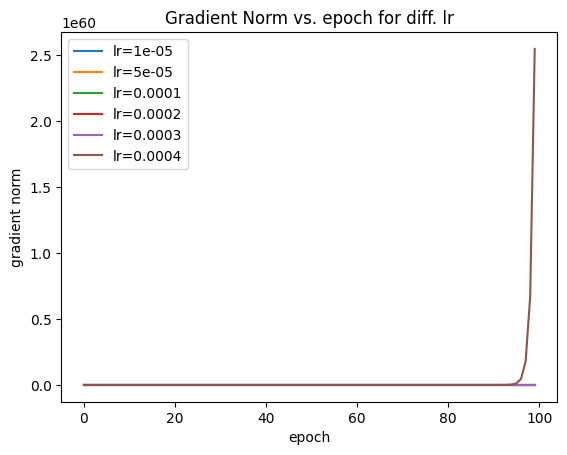

In [921]:
num_epoch = 100
lr_list = [1e-5, 5e-5, 1e-4, 2e-4, 3e-4, 4e-4]
grad_list = np.zeros((num_epoch, len(lr_list))) # (100, 5)
loss_list = np.zeros((num_epoch, len(lr_list)))

for i in range(len(lr_list)):
    w, gradient_list, loss = gradientDescent(num_epoch = 100, learning_rate = lr_list[i], epsilon = 1e-5, X = X_train, Y = y_train)
    grad_list[:, i] = gradient_list.reshape(-1)
    loss_list[:, i] = loss.reshape(-1)

for i, lr in enumerate(lr_list):
    plt.plot(grad_list[:, i], label = f"lr={lr}")
plt.xlabel("epoch"),
plt.ylabel("gradient norm")
plt.title("Gradient Norm vs. epoch for diff. lr")
plt.legend()

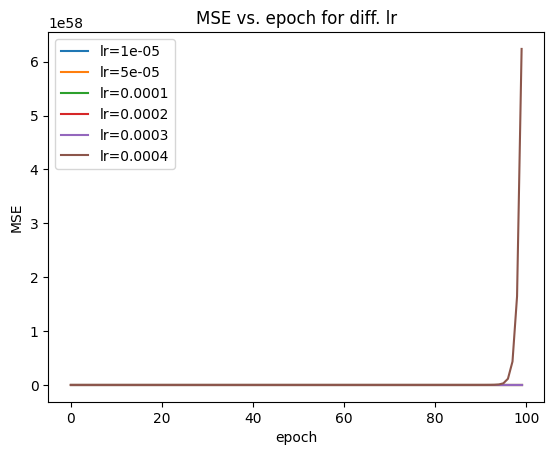

In [923]:
num_epoch = 100
lr_list = [1e-5, 5e-5, 1e-4, 2e-4, 3e-4, 4e-4]
grad_list = np.zeros((num_epoch, len(lr_list))) # (100, 5)
loss_list = np.zeros((num_epoch, len(lr_list)))

for i in range(len(lr_list)):
    w, gradient_list, loss = gradientDescent(num_epoch = 100, learning_rate = lr_list[i], epsilon = 1e-5, X = X_train, Y = y_train)
    grad_list[:, i] = gradient_list.reshape(-1)
    loss_list[:, i] = loss.reshape(-1)

for i, lr in enumerate(lr_list):
    plt.plot(loss_list[:, i], label = f"lr={lr}")
plt.xlabel("epoch"),
plt.ylabel("MSE")
plt.title("MSE vs. epoch for diff. lr")
plt.legend()

In [925]:
num_epoch = 100
epsilon = 1e-5
gradient = Q@w_0 - P
gradient_list = np.zeros((num_epoch, 1))

w = w_0
learning_rate = 1e-5

for i in range(100):
    gradient = Q@w - P
    w = w - learning_rate * gradient
    # print(f"epoch {i}: \n", w)
    print("epoch: ", i)
    if np.linalg.norm(gradient) <= epsilon or np.linalg.norm(gradient) == 0:
        print("epoch: ", i)
        print("w* is: ", w)
        break

print("w* is: ", w)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

# SGD

In [926]:
def rand_shuffle(X = X_train, Y = y_train):
    idx = np.arange(Y.shape[0])
    np.random.shuffle(idx)
    X, Y = X[idx], Y[idx]
    return X, Y

# X_try, Y_try = rand_shuffle(X = X_train, Y = y_train)
X_try.shape
Y_try.shape

(455, 1)

In [927]:
def SGD(num_epoch = 100, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train, 
        shuffle=False, is_replace=False, 
        is_step_decay = False, gamma = 0.9):
    # set rand seed for shuffle reproducability 
    np.random.seed(123)

    # initialize weight
    w_0 = np.zeros((X.shape[1], 1))
    w = w_0

    # track training grad and loss
    gradient_list = np.zeros((num_epoch, 1))
    loss_list = np.zeros((num_epoch, 1))
    
    # loop through epoch
    for epoch in range(num_epoch):
        # grad_per_epoch = np.zeros((X.shape[1], 1))
        loss_per_epoch = np.zeros((X.shape[0], 1))

        ##############################
        # if step decay:
        if is_step_decay:
            lr = learning_rate * (gamma ** (epoch))
        else: 
            lr = learning_rate

        ############################
        # shuffle training set for each epoch if True
        if shuffle:
            X_curr, Y_curr = rand_shuffle(X, Y)
        else: 
            X_curr, Y_curr = X, Y

        for i in range(X_curr.shape[0]): 
            index = np.random.choice(X_curr.shape[0], size=1, replace=is_replace)
            x_i = X_curr[index, :]
            y_i = Y_curr[index]

            Q = 2*x_i.T@x_i
            P = 2*x_i.T@y_i

            gradient = Q@w - P
            # grad_norm = np.linalg.norm(gradient)
            # grad_per_epoch += gradient

            w = w - lr * gradient
        
            loss_per_epoch[i] = np.linalg.norm(Y - X@w)
        
        Q = 2*X_curr.T@X_curr
        P = 2*X_curr.T@Y_curr
        full_gradient = Q@w - P
        gradient_list[epoch] = np.linalg.norm(full_gradient)
        # gradient_list[epoch] = np.linalg.norm(gradient) # only use last point of the epoch's gradient
        # gradient_list[epoch] = np.linalg.norm(grad_per_epoch) # gradient_list[epoch] = loss_per_epoch[-1] ? np.linalg.norm?
        loss_list[epoch] = np.mean(loss_per_epoch) 
        print("----------- epoch", epoch, "---------------:")
        print(f"    Gradient: {gradient_list[epoch]}")
        print(f"    loss: {loss_list[epoch]}", "\n")

        ###########
        # if momentum: ??????????????????????????????????????????????????????????
        # w_k = gradient_list[epoch]
        # w_k_1
        # gradient_list[epoch] = 

        if gradient_list[epoch] <= epsilon or gradient_list[epoch] == 0:
            print("Converged at epoch: ", epoch)
            # gradient_list = gradient_list[:i+1]
            break
    
    return w, gradient_list, loss_list

In [928]:
w_large_lr, gradients_large_lr, losses_large_lr = SGD(num_epoch = 5000, learning_rate = 1e-4, epsilon = 1e-5, 
                           X = X_train, Y = y_train, shuffle=False, is_replace=False)

w_large_lr

----------- epoch 0 ---------------:
    Gradient: [693.94015744]
    loss: [14.92566567] 

----------- epoch 1 ---------------:
    Gradient: [539.95352646]
    loss: [13.32075016] 

----------- epoch 2 ---------------:
    Gradient: [469.79975721]
    loss: [12.22722012] 

----------- epoch 3 ---------------:
    Gradient: [413.19148399]
    loss: [11.32047819] 

----------- epoch 4 ---------------:
    Gradient: [374.26716797]
    loss: [10.57514559] 

----------- epoch 5 ---------------:
    Gradient: [337.95259772]
    loss: [9.86712702] 

----------- epoch 6 ---------------:
    Gradient: [310.05800487]
    loss: [9.26823118] 

----------- epoch 7 ---------------:
    Gradient: [290.17946739]
    loss: [8.7593843] 

----------- epoch 8 ---------------:
    Gradient: [279.6592222]
    loss: [8.29157496] 

----------- epoch 9 ---------------:
    Gradient: [237.92038485]
    loss: [7.89768267] 

----------- epoch 10 ---------------:
    Gradient: [269.7496457]
    loss: [7.59002566

array([[ 0.62542902],
       [-0.01336299],
       [ 0.01145198],
       [-0.0691224 ],
       [ 0.04684287],
       [ 0.02141261],
       [ 0.1638435 ],
       [-0.19923462],
       [ 0.01540532],
       [-0.02074553],
       [ 0.00754651],
       [-0.29269316],
       [ 0.01540594],
       [ 0.11693609],
       [ 0.12931987],
       [-0.02777409],
       [ 0.0329076 ],
       [ 0.13909502],
       [-0.07480983],
       [-0.02604356],
       [ 0.02834809],
       [-0.36834078],
       [-0.07296093],
       [-0.08606132],
       [ 0.30567683],
       [-0.02467989],
       [ 0.03149877],
       [-0.07638414],
       [-0.05958555],
       [-0.02064854],
       [-0.1105347 ]])

In [929]:
gradients_large_lr

array([[693.94015744],
       [539.95352646],
       [469.79975721],
       ...,
       [ 11.31763858],
       [ 12.80780261],
       [ 43.6310898 ]], shape=(5000, 1))

In [930]:
w_sgd, gradients_sgd, losses_sgd = SGD(num_epoch = 5000, learning_rate = 1e-5, epsilon = 1e-5, 
                           X = X_train, Y = y_train, shuffle=False, is_replace=False)

w_sgd
gradients_sgd
losses_sgd

----------- epoch 0 ---------------:
    Gradient: [1261.74110687]
    loss: [16.58899908] 

----------- epoch 1 ---------------:
    Gradient: [1160.7580491]
    loss: [16.15070175] 

----------- epoch 2 ---------------:
    Gradient: [1067.08252899]
    loss: [15.74179533] 

----------- epoch 3 ---------------:
    Gradient: [978.92574081]
    loss: [15.38074573] 

----------- epoch 4 ---------------:
    Gradient: [897.74140598]
    loss: [15.05186473] 

----------- epoch 5 ---------------:
    Gradient: [832.00934976]
    loss: [14.76353682] 

----------- epoch 6 ---------------:
    Gradient: [778.54345745]
    loss: [14.50603513] 

----------- epoch 7 ---------------:
    Gradient: [728.23044079]
    loss: [14.29631041] 

----------- epoch 8 ---------------:
    Gradient: [699.94223358]
    loss: [14.10361555] 

----------- epoch 9 ---------------:
    Gradient: [662.06915193]
    loss: [13.94088288] 

----------- epoch 10 ---------------:
    Gradient: [621.38506164]
    loss: [

array([[16.58899908],
       [16.15070175],
       [15.74179533],
       ...,
       [ 4.94688081],
       [ 4.94680934],
       [ 4.94684743]], shape=(5000, 1))

In [931]:
losses_sgd

array([[16.58899908],
       [16.15070175],
       [15.74179533],
       ...,
       [ 4.94688081],
       [ 4.94680934],
       [ 4.94684743]], shape=(5000, 1))

In [932]:
print(w_sgd)
print(gradients_sgd)
print(losses_sgd)

[[ 0.62711478]
 [-0.07097591]
 [-0.01005363]
 [-0.05675357]
 [ 0.0584934 ]
 [ 0.01935381]
 [ 0.10398964]
 [-0.09191856]
 [-0.06509129]
 [-0.01352236]
 [ 0.04853732]
 [-0.21580822]
 [ 0.00973089]
 [ 0.01372566]
 [ 0.16126662]
 [-0.02782228]
 [ 0.07154334]
 [ 0.09681627]
 [-0.05484067]
 [-0.02198029]
 [-0.00271831]
 [-0.14282823]
 [-0.05394848]
 [-0.05087573]
 [ 0.10414614]
 [-0.02931572]
 [ 0.02868506]
 [-0.0963609 ]
 [-0.06408107]
 [-0.03545412]
 [-0.10620096]]
[[1261.74110687]
 [1160.7580491 ]
 [1067.08252899]
 ...
 [   6.59802242]
 [   6.31422525]
 [   4.9153369 ]]
[[16.58899908]
 [16.15070175]
 [15.74179533]
 ...
 [ 4.94688081]
 [ 4.94680934]
 [ 4.94684743]]


In [933]:
w_shuffle, gradients_shuffle, losses_shuffle = SGD(num_epoch = 5000, learning_rate = 1e-5, epsilon = 1e-4, 
                           X = X_train, Y = y_train, shuffle=True, is_replace=False)

w_shuffle

----------- epoch 0 ---------------:
    Gradient: [1260.33734097]
    loss: [16.60742472] 

----------- epoch 1 ---------------:
    Gradient: [1154.20581477]
    loss: [16.11282172] 

----------- epoch 2 ---------------:
    Gradient: [1054.50830434]
    loss: [15.70435438] 

----------- epoch 3 ---------------:
    Gradient: [964.44508273]
    loss: [15.34213199] 

----------- epoch 4 ---------------:
    Gradient: [887.1174452]
    loss: [15.01232004] 

----------- epoch 5 ---------------:
    Gradient: [824.19951194]
    loss: [14.74142959] 

----------- epoch 6 ---------------:
    Gradient: [775.87633256]
    loss: [14.4965429] 

----------- epoch 7 ---------------:
    Gradient: [726.96990044]
    loss: [14.29111466] 

----------- epoch 8 ---------------:
    Gradient: [692.69449562]
    loss: [14.09715979] 

----------- epoch 9 ---------------:
    Gradient: [655.99122044]
    loss: [13.92493305] 

----------- epoch 10 ---------------:
    Gradient: [632.39542933]
    loss: [1

array([[ 0.62550283],
       [-0.07078747],
       [-0.01198423],
       [-0.05691958],
       [ 0.05880148],
       [ 0.01874413],
       [ 0.10335291],
       [-0.09306434],
       [-0.06553511],
       [-0.00976708],
       [ 0.04881771],
       [-0.21425529],
       [ 0.00943205],
       [ 0.01314738],
       [ 0.16146422],
       [-0.02959577],
       [ 0.07139596],
       [ 0.09743317],
       [-0.05635737],
       [-0.02271694],
       [-0.00168295],
       [-0.14227518],
       [-0.05420434],
       [-0.05134712],
       [ 0.10435803],
       [-0.02801941],
       [ 0.02879774],
       [-0.09658408],
       [-0.06425379],
       [-0.03501212],
       [-0.10597412]])

In [934]:
w_step_decay, gradients_step_decay, losses_step_decay = SGD(num_epoch = 5000, learning_rate = 1e-3, epsilon = 1e-4, 
                           X = X_train, Y = y_train, shuffle=True, is_replace=False,
                           is_step_decay=True, gamma=0.9)

w_step_decay

----------- epoch 0 ---------------:
    Gradient: [266.16103675]
    loss: [10.6678582] 

----------- epoch 1 ---------------:
    Gradient: [216.1473833]
    loss: [6.720683] 

----------- epoch 2 ---------------:
    Gradient: [109.05492516]
    loss: [5.81635918] 

----------- epoch 3 ---------------:
    Gradient: [102.04533986]
    loss: [5.54648609] 

----------- epoch 4 ---------------:
    Gradient: [129.04037835]
    loss: [5.40325282] 

----------- epoch 5 ---------------:
    Gradient: [78.09118357]
    loss: [5.33978474] 

----------- epoch 6 ---------------:
    Gradient: [75.20131321]
    loss: [5.31244429] 

----------- epoch 7 ---------------:
    Gradient: [33.8624894]
    loss: [5.28205726] 

----------- epoch 8 ---------------:
    Gradient: [28.12001083]
    loss: [5.25516295] 

----------- epoch 9 ---------------:
    Gradient: [91.49210366]
    loss: [5.26361045] 

----------- epoch 10 ---------------:
    Gradient: [124.49147671]
    loss: [5.28475516] 

-------

array([[ 6.27886326e-01],
       [-4.25751574e-02],
       [-2.05004485e-02],
       [-3.55697881e-02],
       [-3.45469342e-04],
       [ 1.80102089e-02],
       [ 5.17391210e-02],
       [-3.79574084e-02],
       [-6.31734821e-02],
       [-7.89350852e-03],
       [ 3.99669781e-02],
       [-6.62104404e-02],
       [-6.27409454e-03],
       [-5.54259811e-03],
       [ 6.14083471e-02],
       [-2.08489391e-02],
       [ 6.80273525e-02],
       [ 5.56128125e-02],
       [-5.19795613e-02],
       [-1.98722374e-02],
       [-2.25477898e-03],
       [-6.79583114e-02],
       [-4.40503115e-02],
       [-4.23567888e-02],
       [ 4.09931810e-03],
       [-4.31139913e-02],
       [ 6.17215186e-03],
       [-6.03742740e-02],
       [-7.65884632e-02],
       [-4.99766454e-02],
       [-6.30755806e-02]])

In [935]:
gradients_step_decay

array([[266.16103675],
       [216.1473833 ],
       [109.05492516],
       ...,
       [ 14.26819977],
       [ 14.26819977],
       [ 14.26819977]], shape=(5000, 1))

In [936]:
def SGD_momentum(num_epoch = 100, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train, 
        shuffle=False, is_replace=False, 
        is_step_decay = False, gamma = 0.9, 
        is_momentum = True,):
    # set rand seed for shuffle reproducability 
    np.random.seed(123)

    # initialize weight
    w_0 = np.zeros((X.shape[1], 1))
    w = w_0

    # track training grad and loss
    gradient_list = np.zeros((num_epoch, 1))
    loss_list = np.zeros((num_epoch, 1))
    weight_list = np.zeros((num_epoch, 1))
    
    # loop through epoch
    for epoch in range(num_epoch):
        # grad_per_epoch = np.zeros((X.shape[1], 1))
        loss_per_epoch = np.zeros((X.shape[0], 1))

        ##############################
        # if step decay:
        if is_step_decay:
            lr = learning_rate * (gamma ** (epoch))
        else: 
            lr = learning_rate

        ############################
        # shuffle training set for each epoch if True
        if shuffle:
            X_curr, Y_curr = rand_shuffle(X, Y)
        else: 
            X_curr, Y_curr = X, Y

        #####################
        # momentum
        if is_momentum:
            index = np.random.choice(X_curr.shape[0], size=1, replace=is_replace)
            x_i = X_curr[index, :]
            y_i = Y_curr[index]

            Q = 2*x_i.T@x_i
            P = 2*x_i.T@y_i

            gradient = Q@w - P
            w = w - lr * gradient

        for i in range(X_curr.shape[0]): 
            index = np.random.choice(X_curr.shape[0], size=1, replace=is_replace)
            x_i = X_curr[index, :]
            y_i = Y_curr[index]

            Q = 2*x_i.T@x_i
            P = 2*x_i.T@y_i

            gradient = Q@w - P
            # grad_norm = np.linalg.norm(gradient)
            # grad_per_epoch += gradient

            w = w - lr * gradient
        
            loss_per_epoch[i] = np.linalg.norm(Y - X@w)
        
        Q = 2*X_curr.T@X_curr
        P = 2*X_curr.T@Y_curr
        full_gradient = Q@w - P
        gradient_list[epoch] = np.linalg.norm(full_gradient)
        # gradient_list[epoch] = np.linalg.norm(gradient) # only use last point of the epoch's gradient
        # gradient_list[epoch] = np.linalg.norm(grad_per_epoch) # gradient_list[epoch] = loss_per_epoch[-1] ? np.linalg.norm?
        loss_list[epoch] = np.mean(loss_per_epoch) 
        print("----------- epoch", epoch, "---------------:")
        print(f"    Gradient: {gradient_list[epoch]}")
        print(f"    loss: {loss_list[epoch]}", "\n")

        ###########
        # if momentum: ??????????????????????????????????????????????????????????
        # w_k = gradient_list[epoch]
        # w_k_1
        # gradient_list[epoch] = 

        if gradient_list[epoch] <= epsilon or gradient_list[epoch] == 0:
            print("Converged at epoch: ", epoch)
            # gradient_list = gradient_list[:i+1]
            break
    
    return w, gradient_list, loss_list

In [937]:
def SGD_mini_batch(num_epoch = 100, learning_rate = 1e-5, epsilon = 1e-5, 
                   X = X_train, Y = y_train, shuffle=False, is_replace=False,
                   batch_size = 32):
    # set rand seed for shuffle reproducability 
    np.random.seed(123)

    # initialize weight
    w_0 = np.zeros((X.shape[1], 1))
    w = w_0

    # track training grad and loss
    gradient_list = np.zeros((num_epoch, 1))
    loss_list = np.zeros((num_epoch, 1))
    
    # loop through epoch
    for epoch in range(num_epoch):
        gamma = 0.8
        lr = learning_rate * (gamma ** (epoch-1))
        grad_per_epoch = np.zeros((X.shape[0], 1))
        loss_per_epoch = np.zeros((X.shape[0], 1))
        # shuffle training set for each epoch if True
        if shuffle:
            X_curr, Y_curr = rand_shuffle(X, Y)
        else: 
            X_curr, Y_curr = X, Y

        for i in range(X_curr.shape[0] // batch_size): 
            if i * batch_size < (X_curr.shape[0] // batch_size) * batch_size:
                index = np.random.choice(X_curr.shape[0], size=batch_size, replace=is_replace)
            else:
                index = np.random.choice(X_curr.shape[0], size=X_curr.shape[0] - (i-1)*batch_size, replace=is_replace)

            x_i = X_curr[index, :]
            y_i = Y_curr[index]            

            Q = 2*x_i.T@x_i
            P = 2*x_i.T@y_i

            gradient = Q@w - P
            grad_norm = np.linalg.norm(gradient)
            grad_per_epoch[i] = grad_norm

            w = w - learning_rate * gradient
        
            loss_per_epoch[i] = np.linalg.norm(Y - X@w)
        
        Q = 2*X_curr.T@X_curr
        P = 2*X_curr.T@Y_curr
        full_gradient = Q@w - P
        gradient_list[epoch] = np.linalg.norm(full_gradient)
        # gradient_list[epoch] = np.mean(grad_per_epoch)
        # loss_list[epoch] = np.mean(loss_per_epoch)
        loss_list[epoch] = np.linalg.norm(Y - X@w)
        print("----------- epoch", epoch, "---------------:")
        print(f"    Gradient: {gradient_list[epoch]}")
        print(f"    loss: {loss_list[epoch]}", "\n")

        if np.mean(grad_per_epoch) <= epsilon or np.mean(grad_per_epoch) == 0:
            print("Converged at epoch: ", epoch)
            # gradient_list = gradient_list[:i+1]
            break
    
    return w, gradient_list, loss_list

In [938]:
w_batch, gradient_batch, loss_batch = SGD_mini_batch(num_epoch = 5000, learning_rate = 1e-5, epsilon = 1e-5, 
                                            X = X_train, Y = y_train, shuffle=True, is_replace=False,
                                            batch_size = 32)
w_batch

----------- epoch 0 ---------------:
    Gradient: [1258.02103699]
    loss: [16.34099644] 

----------- epoch 1 ---------------:
    Gradient: [1149.80453437]
    loss: [15.89030951] 

----------- epoch 2 ---------------:
    Gradient: [1063.71147857]
    loss: [15.54554497] 

----------- epoch 3 ---------------:
    Gradient: [980.38508058]
    loss: [15.20339146] 

----------- epoch 4 ---------------:
    Gradient: [909.69533147]
    loss: [14.91189078] 

----------- epoch 5 ---------------:
    Gradient: [851.75468206]
    loss: [14.67045162] 

----------- epoch 6 ---------------:
    Gradient: [782.47021278]
    loss: [14.40979744] 

----------- epoch 7 ---------------:
    Gradient: [743.43985445]
    loss: [14.21958011] 

----------- epoch 8 ---------------:
    Gradient: [716.78741425]
    loss: [14.06130418] 

----------- epoch 9 ---------------:
    Gradient: [687.22951724]
    loss: [13.90506367] 

----------- epoch 10 ---------------:
    Gradient: [645.03276232]
    loss: 

array([[ 0.62503785],
       [-0.07083522],
       [-0.01172304],
       [-0.056686  ],
       [ 0.05777929],
       [ 0.01966472],
       [ 0.10432447],
       [-0.09080079],
       [-0.06571888],
       [-0.01378219],
       [ 0.04994367],
       [-0.21320676],
       [ 0.00924101],
       [ 0.01340715],
       [ 0.16130059],
       [-0.02860393],
       [ 0.07078495],
       [ 0.09768721],
       [-0.05659377],
       [-0.02166774],
       [-0.00364141],
       [-0.14139751],
       [-0.0539704 ],
       [-0.05068509],
       [ 0.10340977],
       [-0.02925932],
       [ 0.02868694],
       [-0.09660395],
       [-0.06574164],
       [-0.03424458],
       [-0.10733366]])

In [939]:
gradient_batch

array([[1258.02103699],
       [1149.80453437],
       [1063.71147857],
       ...,
       [   9.90891723],
       [   7.55631439],
       [   6.33781365]], shape=(5000, 1))

In [940]:
loss_batch

array([[16.34099644],
       [15.89030951],
       [15.54554497],
       ...,
       [ 4.94821402],
       [ 4.94800201],
       [ 4.94791519]], shape=(5000, 1))

## Graphing SGD methods comparisons:

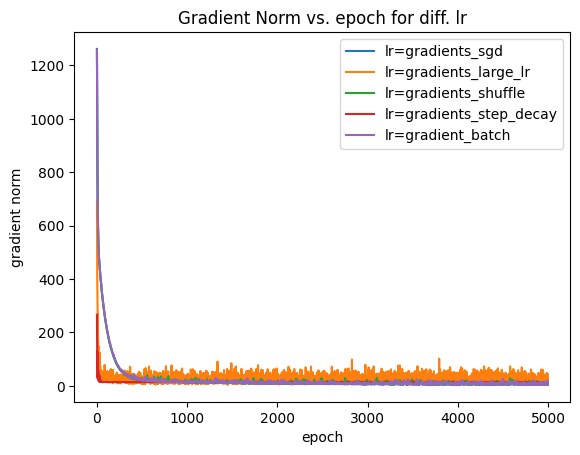

In [941]:
num_epoch = 5000

w, gradient_list, loss = gradientDescent(num_epoch = num_epoch, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train)

# w_all = [w, w_sgd, w_large_lr, w_shuffle, w_step_decay, w_batch]
grad_all = [gradients_sgd, gradients_large_lr, gradients_shuffle, gradients_step_decay, gradient_batch]
loss_all = [losses_sgd, losses_large_lr, losses_shuffle, losses_step_decay, loss_batch]

grad_list = np.zeros((num_epoch, len(grad_all))) # (5000, 5)
loss_list = np.zeros((num_epoch, len(grad_all)))

for i in range(len(grad_all)):
    grad_list[:, i] = grad_all[i].reshape(-1)
    loss_list[:, i] = loss_all[i].reshape(-1)

for i in range(len(grad_all)):
    grad_types = ["gradients_sgd", "gradients_large_lr", "gradients_shuffle", "gradients_step_decay", "gradient_batch"]
    plt.plot(grad_list[:, i], label = f"lr={grad_types[i]}")
plt.xlabel("epoch"),
# plt.xscale("log")
plt.ylabel("gradient norm")
# plt.yscale("log")
plt.title("Gradient Norm vs. epoch for diff. lr")
plt.legend()

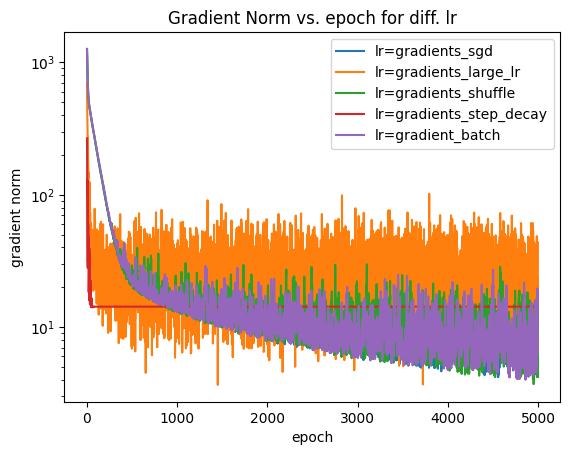

In [942]:
num_epoch = 5000

w, gradient_list, loss = gradientDescent(num_epoch = num_epoch, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train)

# w_all = [w, w_sgd, w_large_lr, w_shuffle, w_step_decay, w_batch]
grad_all = [gradients_sgd, gradients_large_lr, gradients_shuffle, gradients_step_decay, gradient_batch]
loss_all = [losses_sgd, losses_large_lr, losses_shuffle, losses_step_decay, loss_batch]

grad_list = np.zeros((num_epoch, len(grad_all))) # (5000, 5)
loss_list = np.zeros((num_epoch, len(grad_all)))

for i in range(len(grad_all)):
    grad_list[:, i] = grad_all[i].reshape(-1)
    loss_list[:, i] = loss_all[i].reshape(-1)

for i in range(len(grad_all)):
    grad_types = ["gradients_sgd", "gradients_large_lr", "gradients_shuffle", "gradients_step_decay", "gradient_batch"]
    plt.plot(grad_list[:, i], label = f"lr={grad_types[i]}")
plt.xlabel("epoch"),
# plt.xscale("log")
plt.ylabel("gradient norm")
plt.yscale("log")
plt.title("Gradient Norm vs. epoch for diff. lr")
plt.legend()

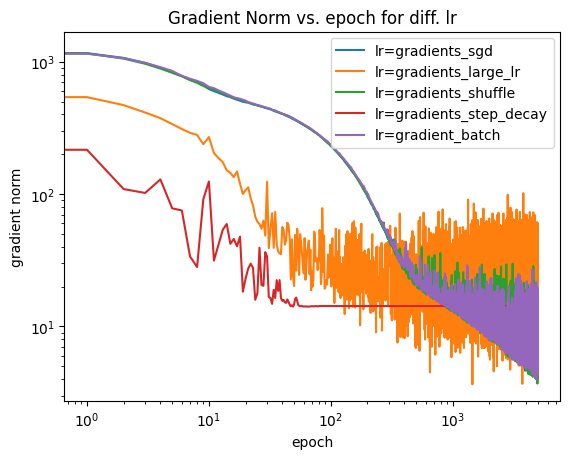

In [943]:
num_epoch = 5000

w, gradient_list, loss = gradientDescent(num_epoch = num_epoch, learning_rate = 1e-5, epsilon = 1e-5, X = X_train, Y = y_train)

# w_all = [w, w_sgd, w_large_lr, w_shuffle, w_step_decay, w_batch]
grad_all = [gradients_sgd, gradients_large_lr, gradients_shuffle, gradients_step_decay, gradient_batch]
loss_all = [losses_sgd, losses_large_lr, losses_shuffle, losses_step_decay, loss_batch]

grad_list = np.zeros((num_epoch, len(grad_all))) # (5000, 5)
loss_list = np.zeros((num_epoch, len(grad_all)))

for i in range(len(grad_all)):
    grad_list[:, i] = grad_all[i].reshape(-1)
    loss_list[:, i] = loss_all[i].reshape(-1)

for i in range(len(grad_all)):
    grad_types = ["gradients_sgd", "gradients_large_lr", "gradients_shuffle", "gradients_step_decay", "gradient_batch"]
    plt.plot(grad_list[:, i], label = f"lr={grad_types[i]}")
plt.xlabel("epoch"),
plt.xscale("log")
plt.ylabel("gradient norm")
plt.yscale("log")
plt.title("Gradient Norm vs. epoch for diff. lr")
plt.legend()

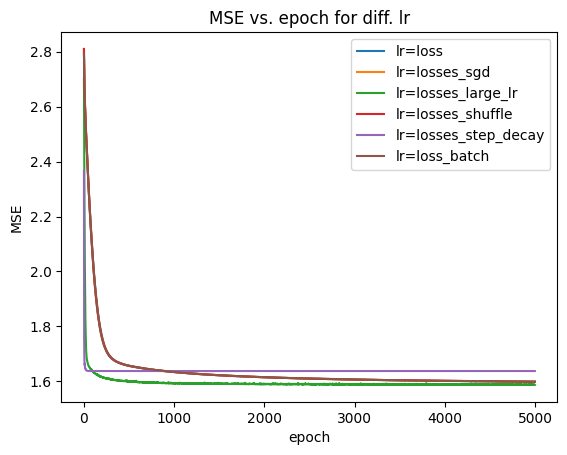

In [945]:
# w_all = [w, w_sgd, w_large_lr, w_shuffle, w_step_decay, w_batch]
# grad_all = [gradients_sgd, gradients_large_lr, gradients_shuffle, gradients_step_decay, gradient_batch]
loss_all = [loss, losses_sgd, losses_large_lr, losses_shuffle, losses_step_decay, loss_batch]
loss_all = np.log(loss_all)

# grad_list = np.zeros((num_epoch, len(loss_all))) # (5000, 5)
loss_list = np.zeros((num_epoch, len(loss_all)))

for i in range(len(loss_all)):
    # grad_list[:, i] = loss_all[i].reshape(-1)
    loss_list[:, i] = loss_all[i].reshape(-1)

for i in range(len(loss_all)):
    loss_types = ["loss", "losses_sgd", "losses_large_lr", "losses_shuffle", "losses_step_decay", "loss_batch"]
    plt.plot(loss_list[:, i], label = f"lr={loss_types[i]}")

plt.xlabel("epoch"),
plt.ylabel("MSE")
plt.title("MSE vs. epoch for diff. lr")
plt.legend()